## Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import sqlite3
import pip 
!pip install --upgrade seaborn

#hypothesis testing 
from scipy.stats import ttest_ind
#stats model
import scipy.stats as stats

warnings.filterwarnings('ignore') 

## Load Datasets

In [6]:
# creating database connection 

conn = sqlite3.connect('inventory.db')

#fetching vendor summary data


df = pd.read_sql_query("select * from vendor_sales_summary", conn) 


## Previewing the head of each dataframe so we know what data we are working with.

In [7]:
df.head() 


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128.0,BROWN-FORMAN CORP,1233.0,Jack Daniels No 7 Black,26.27,36.99,1750.0,91152.0,2394563.04,15821.0,569397.79,102067.64,29068.78,68601.68,-1825165.25,-320.543086,0.173567,0.237788
1,4425.0,MARTIGNETTI COMPANIES,3405.0,Tito's Handmade Vodka,23.19,28.99,1750.0,94737.0,2196951.03,15374.0,454352.26,80642.75,28247.57,144929.24,-1742598.77,-383.534742,0.162281,0.206810
2,17035.0,PERNOD RICARD USA,8068.0,Absolut 80 Proof,18.24,24.99,1750.0,116794.0,2130322.56,18363.0,467413.37,73567.15,33739.45,123780.22,-1662909.19,-355.768426,0.157226,0.219410
3,3960.0,DIAGEO NORTH AMERICA INC,3545.0,Ketel One Vodka,21.89,29.99,1750.0,82225.0,1799905.25,18946.0,569730.54,81137.07,34811.11,257032.07,-1230174.71,-215.922199,0.230417,0.316534
4,480.0,BACARDI USA INC,3858.0,Grey Goose Vodka,17.77,23.99,750.0,97108.0,1725609.16,15601.0,374495.99,66912.16,12283.56,89286.27,-1351113.17,-360.781746,0.160656,0.217022


In [8]:
#summary statistic 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,9048.0,1.021617e+04,17900.869951,2.00,3664.000000,7153.000000,9552.000000,1.733570e+05
Brand,9048.0,1.764174e+04,12947.974306,58.00,5345.000000,17744.000000,25070.250000,9.063100e+04
PurchasePrice,9048.0,2.198409e+01,103.165889,0.36,6.800000,10.290000,18.490000,5.681810e+03
ActualPrice,9048.0,3.228457e+01,140.632351,0.49,10.990000,15.990000,26.990000,7.499990e+03
Volume,9048.0,8.529673e+02,642.277235,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,9048.0,2.168428e+03,7204.160344,1.00,26.000000,261.000000,1463.250000,2.035950e+05
TotalPurchaseDollars,9048.0,2.050198e+04,79391.012606,0.71,372.600000,3197.400000,15850.800000,2.394563e+06
TotalSalesQuantity,9048.0,4.303507e+02,1485.728894,0.00,3.000000,45.000000,288.000000,4.525500e+04
TotalSalesDollars,9048.0,5.831243e+03,21130.640504,0.00,71.215000,877.720000,4483.140000,7.024616e+05
TotalSalesPrice,9048.0,2.831405e+03,6619.504525,0.00,23.970000,464.785000,2631.207500,1.020676e+05


## Distribution plot 

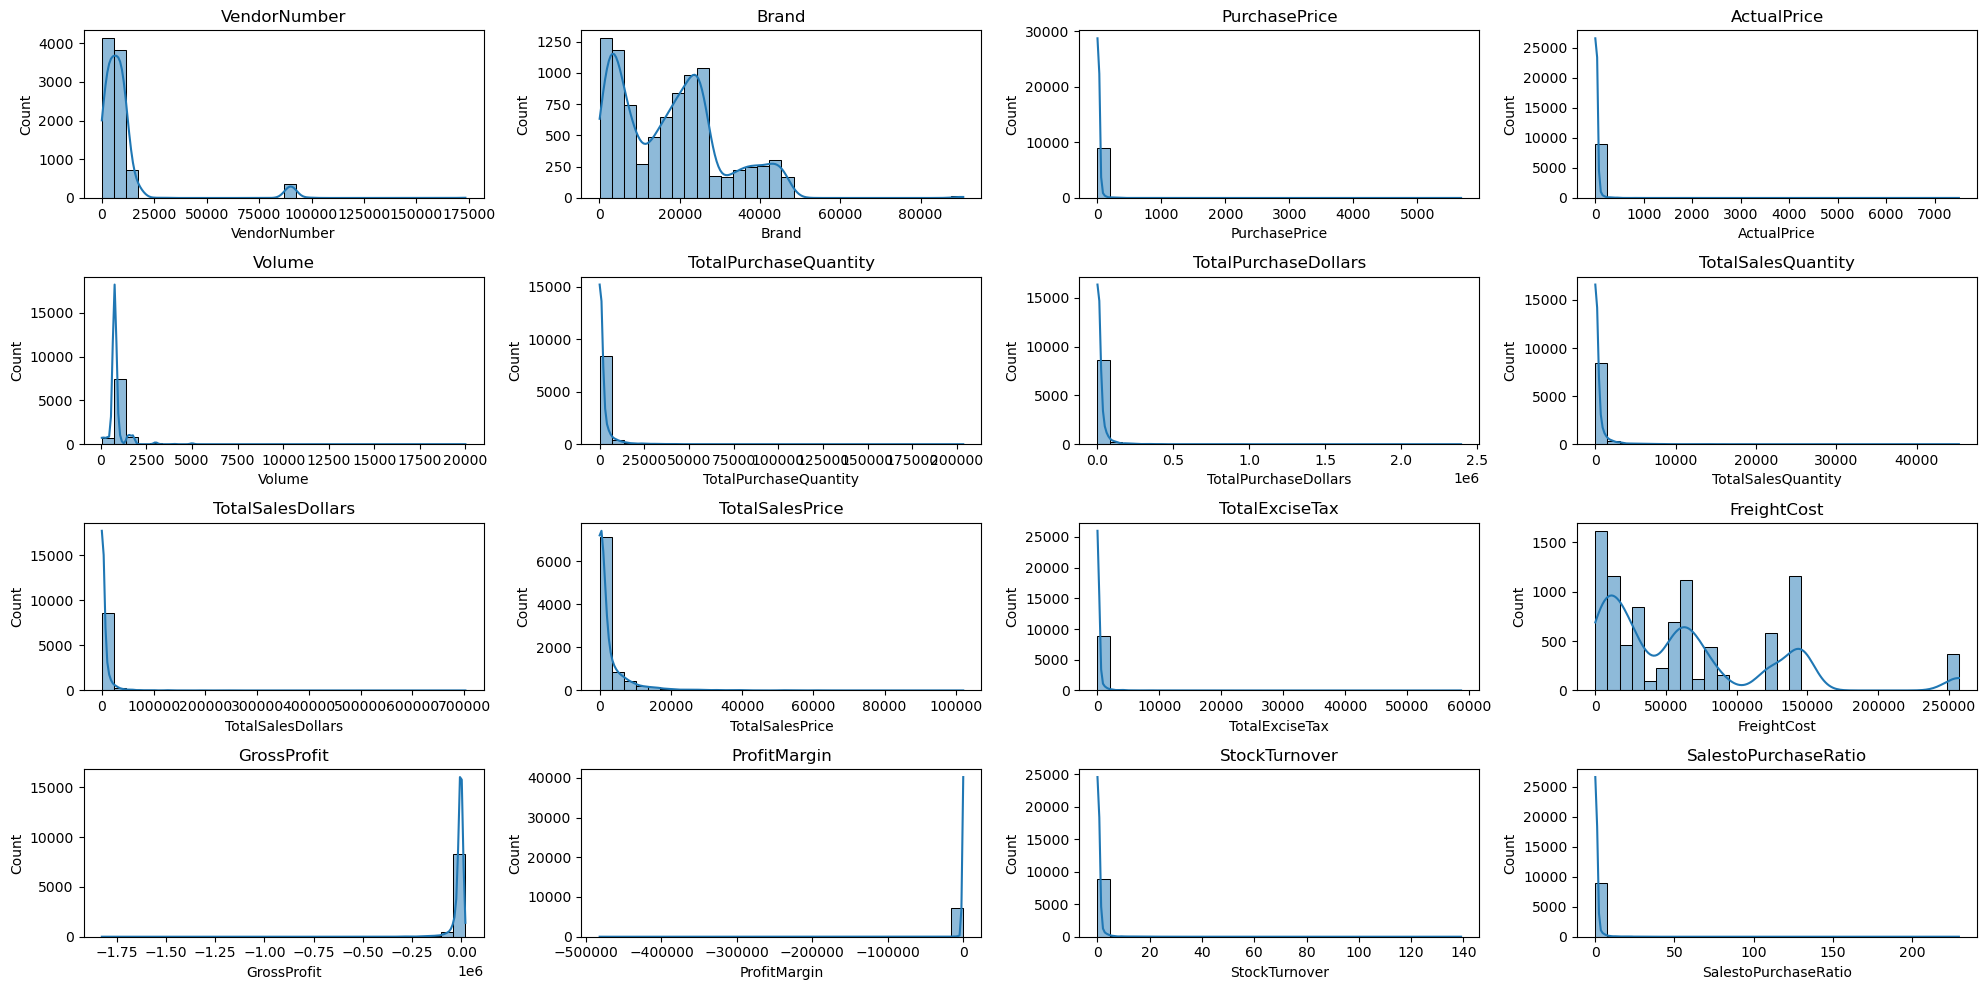

In [9]:
#Distribution plot for Numerical columns 
#plt.subplot(nrows, ncols, index) >Creates a grid of subplots
#Seaborn to plot a histogram of the data in column 'col' > sns.histoplot

#selects only numeric columns (int, float) from the DataFrame
numerical_cols = df.select_dtypes(include = np.number).columns


plt.figure(figsize =(20,10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde =True, bins =30)
    plt.title(col)

plt.tight_layout()
plt.show() 

## Outlier Detection with Boxplots

<function matplotlib.pyplot.show(close=None, block=None)>

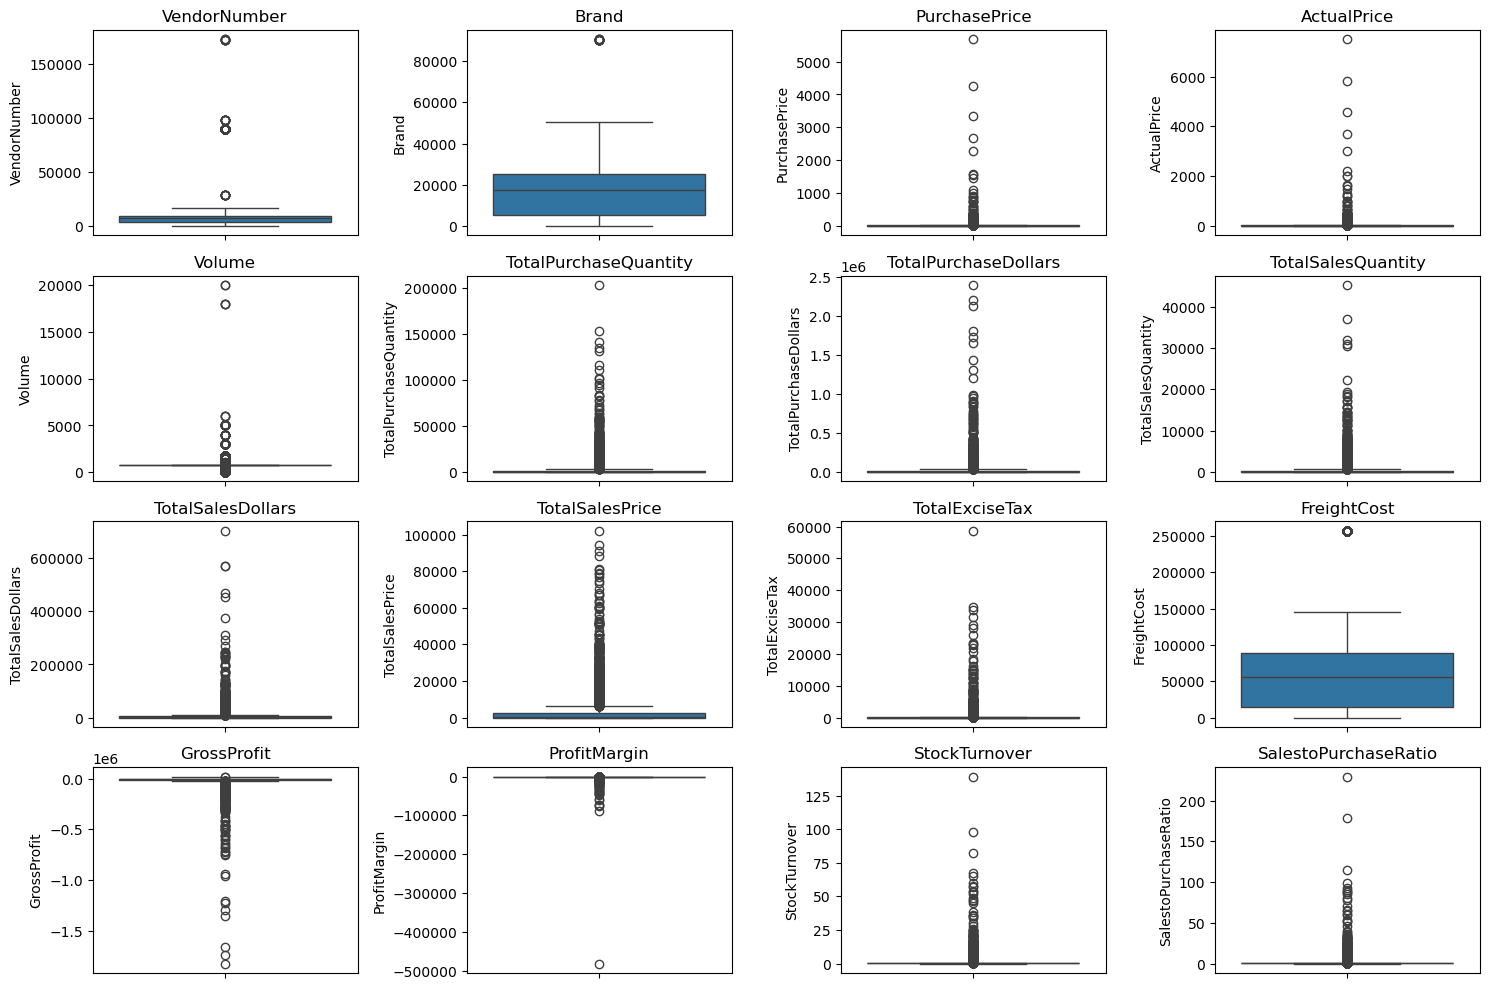

In [10]:
# Outlier Detection with Boxplots

plt.figure(figsize = (15,10))
for i,col in enumerate (numerical_cols):
        plt.subplot(4,4,i+1) 
        sns.boxplot(y=df[col])
        plt.title(col)
plt.tight_layout()
plt.show

## Summary Statistics Insights:

##### Negative & Zero Values:
- Gross profit : Minimum value is -1825165.25 indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at
  discounts lower than the purchase price

- Profit Margin :    gross profit /sales   has a minimum value of - $\infty$ , suggesting cases where sales revenue is 0 or even lower than costs
- Total Sales Quantity & Sales Dollars : Minimum values are 0 , meaning some products were purchased but never sold . These could be slow -moving/ unsellable or obsolete stock goods

##### Outliers indicated by :

- Actual  and Purchase prices:  Max Values (7,499.99 & 5681.81) are significantly higher than mean (32.28 &21.98 ) indicating potential premium products
- Freight cost: Ranging between 0.27 to 257,032.1 suggest inefficient purchasing/logistics or carrier dependent
- Stock Turnover: Ranging between 0 to 139.1 , implies some products are highly sellable while other are idle slow moving products . Value more than 1 indicate that sold quantity for that product is higher than purchasd quantity due to older inventory stock fulfillment 


##  Data removal for inconsistencies

In [15]:
# filter the data by removing inconsistencies

df = pd. read_sql_query(""" SELECT * FROM vendor_sales_summary 

WHERE GrossProfit> 0 
AND ProfitMargin > 0 
AND TotalSalesQuantity > 0 """,conn) 



In [16]:
df


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,516.0,BANFI PRODUCTS CORP,18152.0,Banfi Centine Mntcln Tscna,5.26,10.99,750.0,6953.0,36572.78,4753.0,41201.47,10089.42,532.76,8510.41,4628.69,11.234284,0.683590,1.126561
1,4425.0,MARTIGNETTI COMPANIES,8781.0,Rodney Strong Cab Svgn,10.32,15.99,750.0,3482.0,35934.24,2267.0,38927.33,16252.57,252.96,144929.24,2993.09,7.688917,0.651063,1.083294
2,4425.0,MARTIGNETTI COMPANIES,26383.0,Buehler Chard RRV,7.89,15.99,750.0,3274.0,25831.86,2378.0,29250.22,9256.66,266.10,144929.24,3418.36,11.686613,0.726329,1.132331
3,10754.0,PERFECTA WINES,25197.0,Ch La Rousseliere St Estephe,99.33,149.99,750.0,250.0,24832.50,198.0,29698.02,1199.92,22.24,28720.52,4865.52,16.383314,0.792000,1.195934
4,8112.0,MOET HENNESSY USA INC,1023.0,Hennessy VSOP Cognac + 50mL,35.93,45.99,750.0,655.0,23534.15,514.0,27068.86,5867.88,404.86,48347.26,3534.71,13.058215,0.784733,1.150195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3960.0,DIAGEO NORTH AMERICA INC,8729.0,Smirnoff Light Strawberry,0.74,0.99,50.0,4.0,2.96,6.0,5.94,2.97,0.31,257032.07,2.98,50.168350,1.500000,2.006757
1257,9815.0,WINE GROUP INC,8527.0,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2.0,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364
1258,8004.0,SAZERAC CO INC,5683.0,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6.0,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419
1259,9815.0,WINE GROUP INC,22407.0,Three Wishes Chard,2.25,3.29,750.0,1.0,2.25,1.0,3.29,3.29,0.11,27100.41,1.04,31.610942,1.000000,1.462222


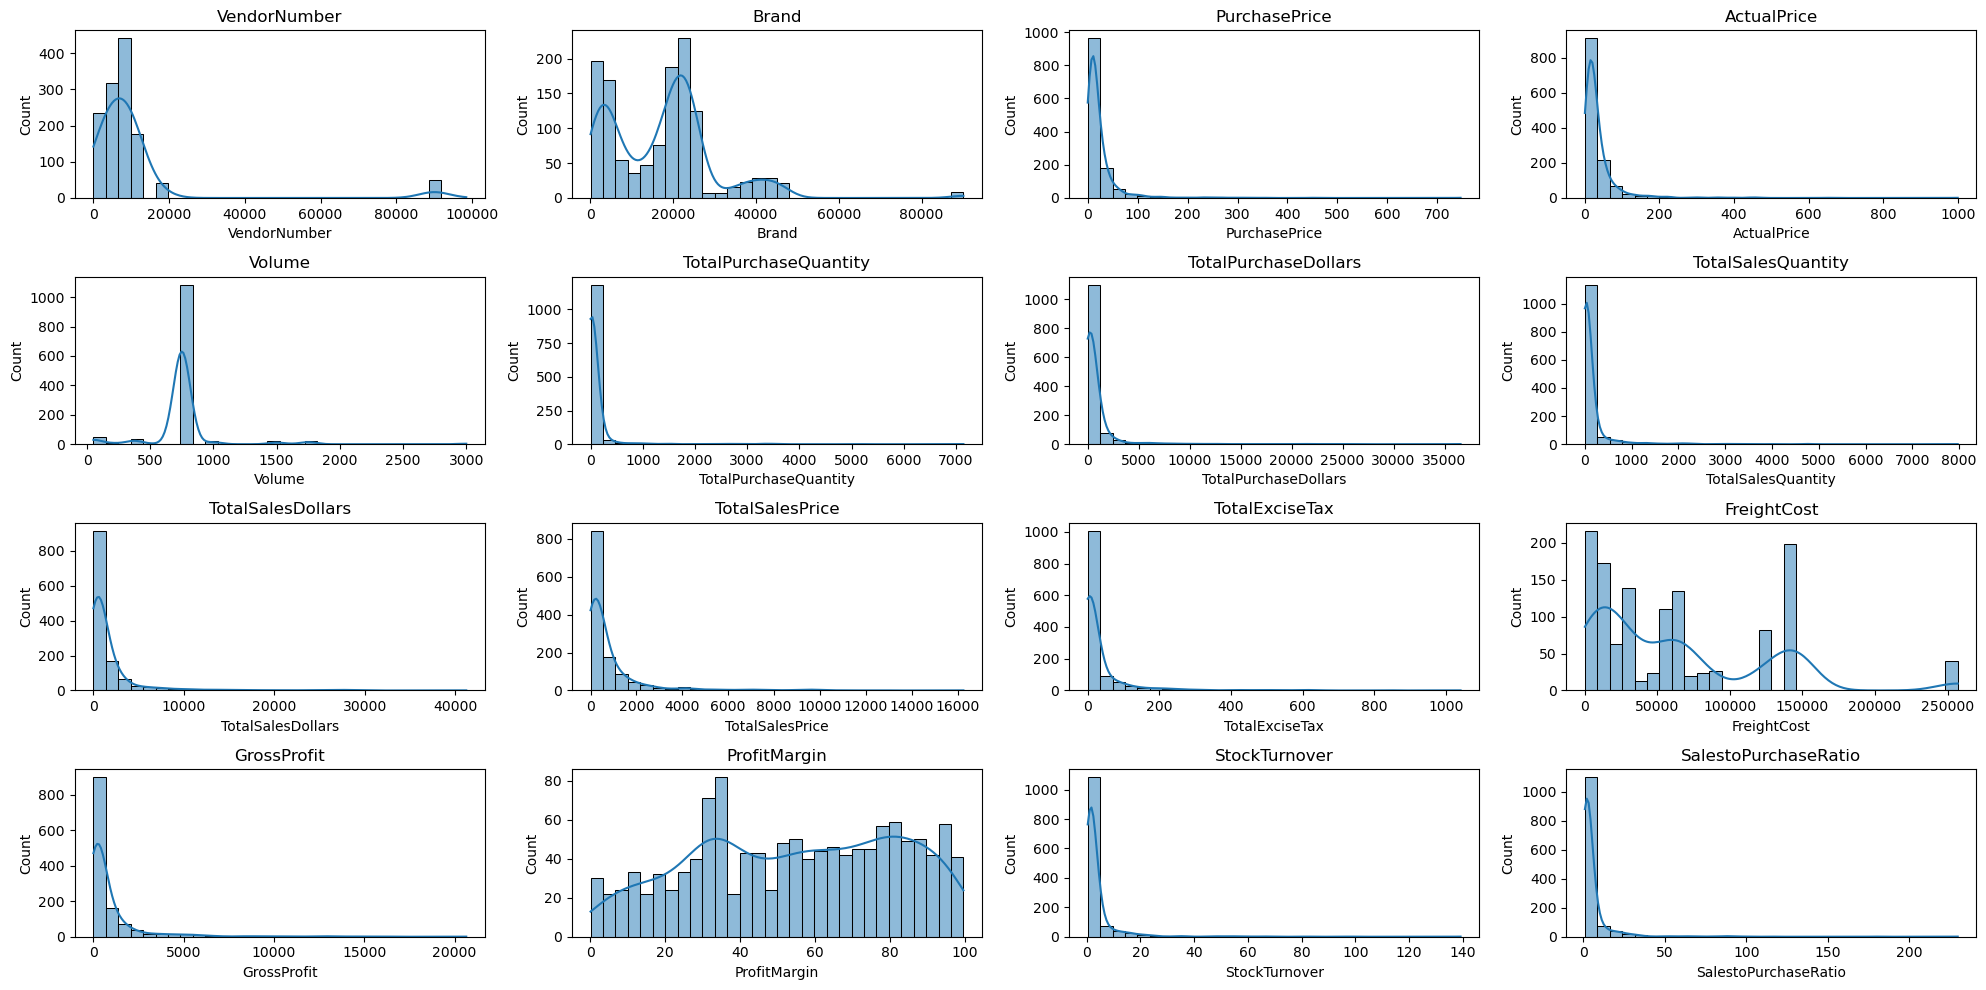

In [17]:
numerical_cols = df.select_dtypes(include = np.number).columns


plt.figure(figsize =(20,10))

for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde =True, bins =30)
    plt.title(col)

plt.tight_layout()
plt.show() 

In [ ]:
## Count Plot for categorical columns:

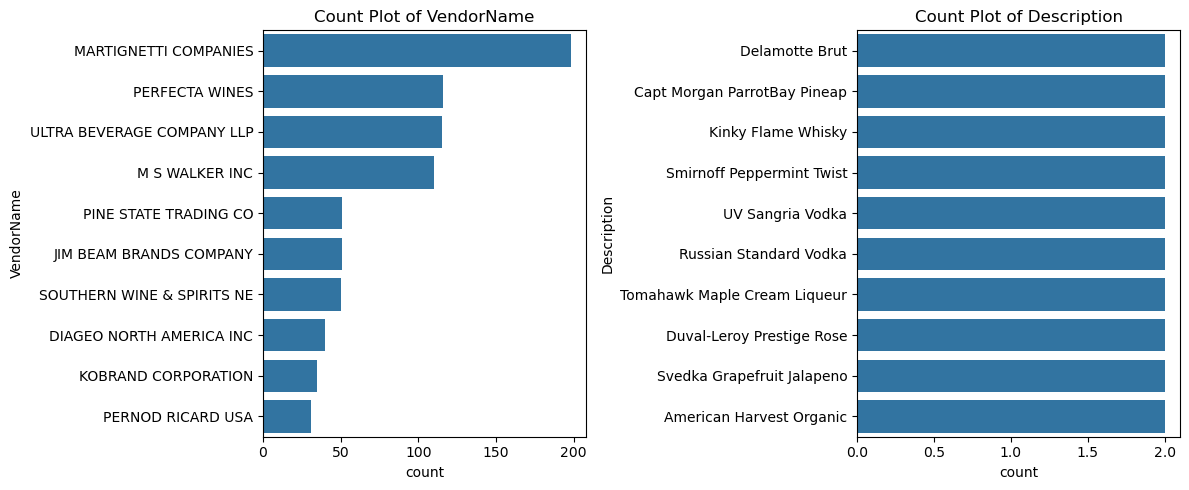

In [18]:
# Count Plots for Categorical Columns
#seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
#description is product name 

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

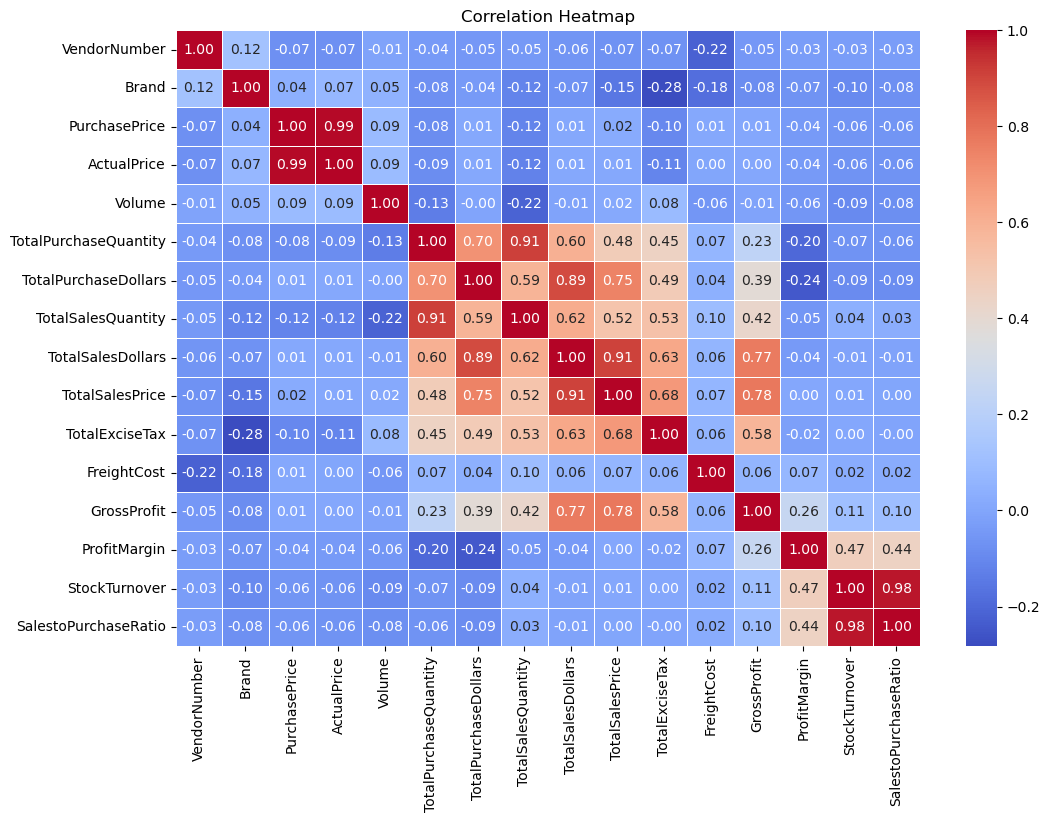

In [20]:
# Correlation Heatmap
#find correlation between 2 numerical variable

plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights
-PurchasePrice has weak correlations with TotalSalesDollars (0.01) and GrossProfit (0.01), suggesting that price variations do not significantly impact sales revenue or profit.

-Strong correlation between total purchase quantity and total sales quantity (0.91), confirming efficient inventory turnover.

-Negative correlation between profit margin & total sales price  suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

-StockTurnover has weak  correlations with both GrossProfit (0.11) and ProfitMargin (0.47), indicating that faster turnover does not necessarily result in higher profitability

## Data Analysis 

#### Identify Brands that needs Promotional or Pricing Adjustments which exhbit lower sales performance but higher profit margins.

In [ ]:
#pplies different aggregation functions to columns within each group:

#'TotalSalesDollars': 'sum' → Adds up all sales dollars for each product/brand.

#'ProfitMargin': 'mean' → Calculates the average profit margin across all transactions for that product/brand.



brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',  # Sales performance metric
    'ProfitMargin': 'mean'       # Average profit margin
}).reset_index()

brand_performance.sort_values('ProfitMargin')

In [25]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',  # Sales performance metric
    'ProfitMargin': 'mean'       # Average profit margin
})


print (brand_performance) 

                              TotalSalesDollars  ProfitMargin
Description                                                  
12 Days of Pearls Gift Set               279.72     97.429572
13th Colony Sthrn Corn Whsky             149.95     89.376459
14 Hands Rsl Wash                         93.91     12.597168
1800 Select Silver Tequila               449.85     63.667889
1800 Silver w/ Shot Glasses             1866.29     12.071543
...                                         ...           ...
Zardetto Pros di Coneg Brut              203.12     80.858606
Zhenka Vodka 80 Proof                    220.44     86.154963
Zinsane Znfdl Lodi                     10570.77     98.095881
Zion Dolev Muscato                       494.55     25.451420
von Buhl Jazz Rsl                        339.77     63.092680

[1247 rows x 2 columns]


In [27]:
 #Converts the grouped result back into a regular DataFrame with Description as a normal column (instead of the index).


brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',  # Sales performance metric
    'ProfitMargin': 'mean'       # Average profit margin
}).reset_index()



brand_performance.sort_values('ProfitMargin')

,Description,TotalSalesDollars,ProfitMargin
1040,Simi Pnt Nr Sonoma Cnty,11528.01,0.034611
219,Castillo Spiced Rum,689.42,0.081228
840,Oak Leaf Svgn Bl Cal,143.52,0.167224
366,Clayhouse Malbec Paso Robles,6984.46,0.512280
937,Querceto La Corte Toscana,449.91,0.517881
...,...,...,...
804,Mother's Holiday Nog,476.47,98.927530
320,Ch Rollan de By Medoc,1674.33,98.984668
1150,Three Olives Grape Vodka,81.18,99.125400
137,Blue Chair Bay Coconut Rum,1377.09,99.440850


In [32]:
# threshold for "low sales" (bottom 15%) and "high margin" (top 15%)
threshold_lowsales = brand_performance['TotalSalesDollars'].quantile(0.15)
threshold_highmargin = brand_performance['ProfitMargin'].quantile(0.85)

print(threshold_lowsales)
print(threshold_highmargin)

151.72500000000002
86.01370164154022


In [38]:
# Filter brands with low sales but high profit margins


target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= threshold_lowsales) &
    (brand_performance['ProfitMargin'] >= threshold_highmargin)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
1172,Tracia Syrah,44.94,88.495772
447,Dr McGillicuddy's Apple Pie,62.72,96.269133
413,DeKuyper Mixed Berry Medley,65.94,87.928420
932,Promesses de France CdRhone,71.91,92.337644
56,Aresti Pnt Nr Curico Vly,74.85,95.617902
1150,Three Olives Grape Vodka,81.18,99.125400
837,Nyers Vyds Sage Canyon Red,94.95,86.203265
1079,St Elder Elderflower Liqueur,97.02,94.145537
173,C Y Toro Carmenere Terrunyo,131.94,89.032894
794,Mojoshot Blue Lagoon RTD,137.61,93.103699


### ScatterPlot for Brands promotion

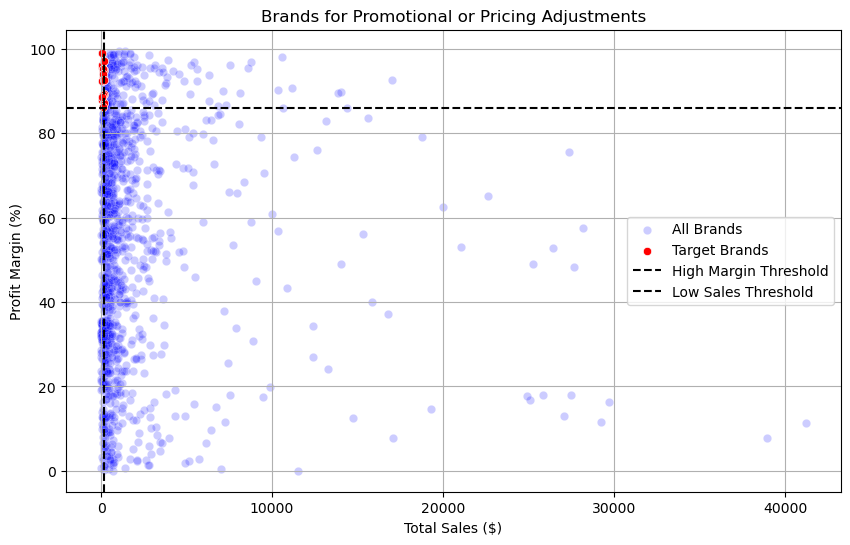

In [40]:
#seaborn.scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)
#data = df 

plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

#plt.axhline(...)
#Draws a horizontal line across the entire plot.
#threshold_highmargin → y-position where the line will be drawn.
#linestyle='--' → dashed line style.
#color='black' → black line color.  label="High Margin Threshold" → adds a legend entry for this line.


plt.axhline(threshold_highmargin, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(threshold_lowsales, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

###  Which vendors and brands demonstrate the highest sales performance?

In [42]:
# Top Vendors & Brands by Sales Performance
#description is product name 

top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         421230.22
ULTRA BEVERAGE COMPANY LLP    266925.47
M S WALKER INC                198536.61
PERFECTA WINES                147917.19
BACARDI USA INC                93402.89
MOET HENNESSY USA INC          86190.34
STATE WINE & SPIRITS           73941.52
JIM BEAM BRANDS COMPANY        73221.17
DIAGEO NORTH AMERICA INC       72064.55
BROWN-FORMAN CORP              71056.54
Name: TotalSalesDollars, dtype: float64

In [45]:
#If the number is at least one million, it will be converted into millions.

#  value / 1_000_000 → reduces the number to “millions.”

#   :.2f → formats it as a floating-point number with 2 decimal places.

#   f"{...}M" → appends "M" at the end to indicate millions.






def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [59]:
#top vendor is dataframe

#.apply() runs a function on each value (x) in the Series.

#Here, a lambda function is used → lambda x: format_dollars(x)
#lambda x: format_dollars(x)   .for every value x in top_vendors, it calls format_dollars(x).


top_vendors.apply(lambda x:format_dollars(x))

VendorName
MARTIGNETTI COMPANIES         421.23K
ULTRA BEVERAGE COMPANY LLP    266.93K
M S WALKER INC                198.54K
PERFECTA WINES                147.92K
BACARDI USA INC                93.40K
MOET HENNESSY USA INC          86.19K
STATE WINE & SPIRITS           73.94K
JIM BEAM BRANDS COMPANY        73.22K
DIAGEO NORTH AMERICA INC       72.06K
BROWN-FORMAN CORP              71.06K
Name: TotalSalesDollars, dtype: object

In [61]:
top_brands

Description
Banfi Centine Mntcln Tscna      41201.47
Rodney Strong Cab Svgn          38927.33
Ch La Rousseliere St Estephe    29698.02
Buehler Chard RRV               29250.22
Madison's Ranch Cab Svgn        28162.32
Paul Dolan 12 Cab Svgn          27626.57
Napa Highlands Meritage         27502.47
DiSaronna Amaretto Sour VAP     27361.48
Hennessy VSOP Cognac + 50mL     27068.86
Bacardi Twin Pack 2/750mls      26426.78
Name: TotalSalesDollars, dtype: float64

### Bar Chart for Top sales and Top vendors 

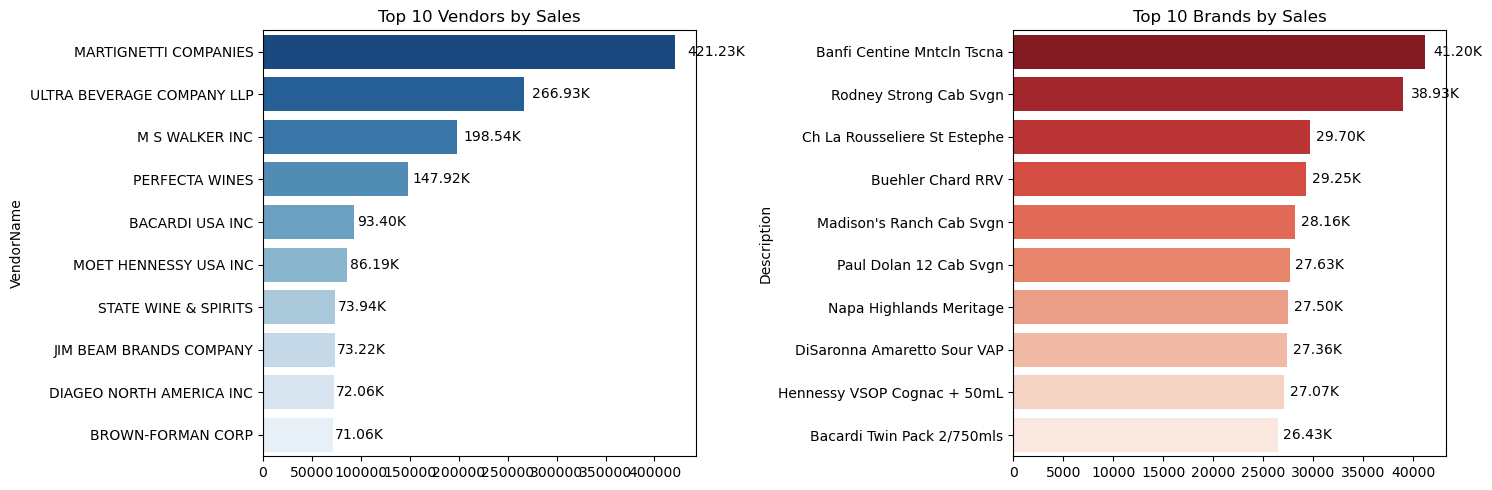

In [65]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)

#Puts the vendor names (index of your Series/DataFrame) on the y-axis.puts the actual sales values (numbers in the Series) on the x-axis.
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")




#. bar.get_y() + bar.get_height() / 2  >>Gets the vertical center of the bar.

#Ensures the text label is placed halfway up the bar (so it aligns nicely in the middle).

# bar.get_width() + (bar.get_width() * 0.02) >> Places the label slightly to the right of the bar (2% beyond its length).


for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.03), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02), 
             bar.get_y() + bar.get_height() / 2, 
             format_dollars(bar.get_width()), 
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [71]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
0,ALISA CARR BEVERAGES,11275.08,4237.62,15512.70,1.057563
1,ATLANTIC IMPORTING COMPANY,620.40,399.26,1019.66,0.058191
2,BACARDI USA INC,36030.41,57372.48,93402.89,3.379526
3,BANFI PRODUCTS CORP,43395.60,7898.45,51294.05,4.070354
4,BLACK PRINCE DISTILLERY INC,4288.20,640.27,4928.47,0.402218
5,BROWN-FORMAN CORP,14564.13,56492.41,71056.54,1.366064
6,CAMPARI AMERICA,2186.12,3992.73,6178.85,0.205050
7,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.005125
8,CASTLE BRANDS CORP.,1541.35,1756.58,3297.93,0.144573
9,CENTEUR IMPORTS LLC,41.04,18.90,59.94,0.003849


### Vendor Purchase contribution

In [70]:

# Rank Vendors by Total Purchase Dollars
vendor_performance = df.groupby("VendorName").agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit": "sum",
    "TotalSalesDollars":"sum"
}).reset_index()

vendor_performance





,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ALISA CARR BEVERAGES,11275.08,4237.62,15512.70
1,ATLANTIC IMPORTING COMPANY,620.40,399.26,1019.66
2,BACARDI USA INC,36030.41,57372.48,93402.89
3,BANFI PRODUCTS CORP,43395.60,7898.45,51294.05
4,BLACK PRINCE DISTILLERY INC,4288.20,640.27,4928.47
...,...,...,...,...
75,VRANKEN AMERICA,1774.40,951.91,2726.31
76,WEIN BAUER INC,36.56,5.38,41.94
77,WESTERN SPIRITS BEVERAGE CO,9241.44,4345.70,13587.14
78,WILLIAM GRANT & SONS INC,7651.74,6908.05,14559.79


In [73]:

# Calculate Contribution % to Overall Procurement
vendor_performance["Purchase_Contribution%"] = (vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum()) * 100

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
0,ALISA CARR BEVERAGES,11275.08,4237.62,15512.70,1.057563
1,ATLANTIC IMPORTING COMPANY,620.40,399.26,1019.66,0.058191
2,BACARDI USA INC,36030.41,57372.48,93402.89,3.379526
3,BANFI PRODUCTS CORP,43395.60,7898.45,51294.05,4.070354
4,BLACK PRINCE DISTILLERY INC,4288.20,640.27,4928.47,0.402218
5,BROWN-FORMAN CORP,14564.13,56492.41,71056.54,1.366064
6,CAMPARI AMERICA,2186.12,3992.73,6178.85,0.205050
7,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.005125
8,CASTLE BRANDS CORP.,1541.35,1756.58,3297.93,0.144573
9,CENTEUR IMPORTS LLC,41.04,18.90,59.94,0.003849


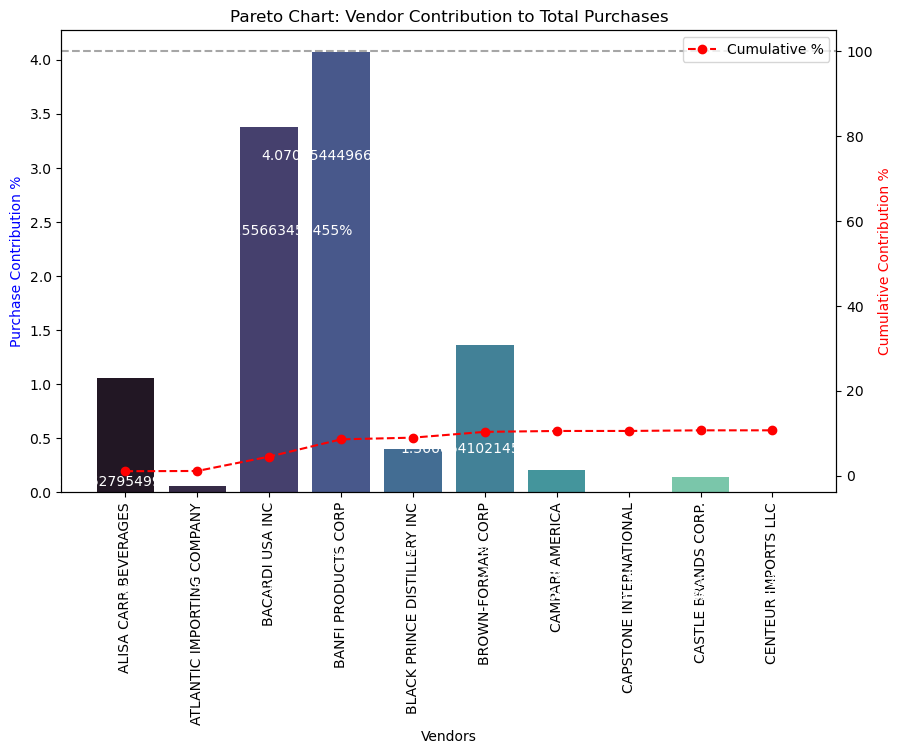

In [81]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'],  palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

### Does Bulk purchase reduce unit price  and what is the optimal purchase volume for cost savings?

In [82]:
# Calculate Unit Purchase Price per Vendor & Volume Group
df["UnitPurchasePrice"] = df["TotalPurchaseDollars"] / df["TotalPurchaseQuantity"]

# Group by Order Sizes (e.g., Small, Medium, Large Purchases)
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

# Analyze Cost Savings per Order Size
bulk_purchase_analysis = df.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()
print(bulk_purchase_analysis)

  OrderSize  UnitPurchasePrice
0     Small          37.197703
1    Medium          20.117082
2     Large          11.327500


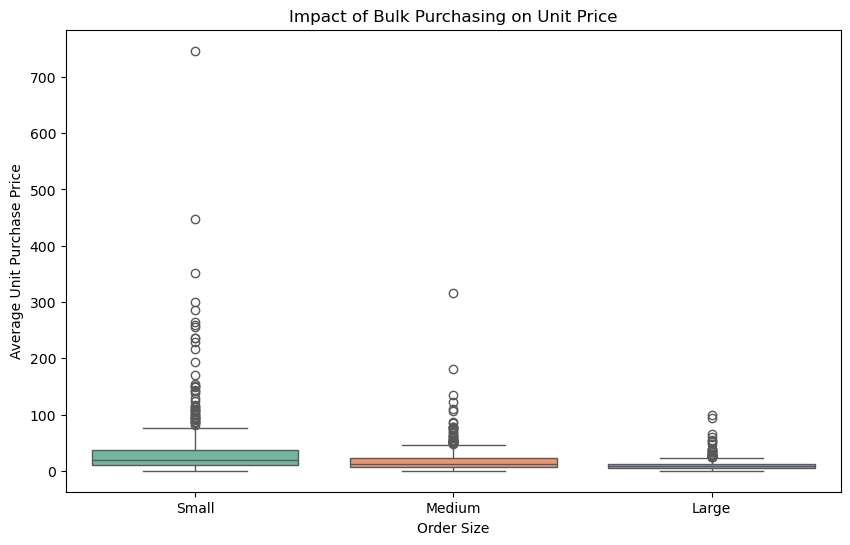

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

### Which vendor is low  inventory turnover showing excess stock /obsolete ? 

In [84]:
#Low Inventory Turnover Vendors
low_turnover_vendors = df[df["StockTurnover"] < 1].groupby("VendorName")["StockTurnover"].mean().reset_index()

# Sort by Lowest Turnover
low_turnover_vendors = low_turnover_vendors.sort_values(by="StockTurnover", ascending=True)
low_turnover_vendors.head(10)

,VendorName,StockTurnover
7,Circa Wines,0.607843
1,BACARDI USA INC,0.651685
19,LAIRD & CO,0.666667
42,TREASURY WINE ESTATES,0.668172
8,DELICATO VINEYARDS INC,0.680039
9,DIAGEO CHATEAU ESTATE WINES,0.695652
21,LUXCO INC,0.705537
51,WINE GROUP INC,0.708333
2,BANFI PRODUCTS CORP,0.714076
46,VINILANDIA USA,0.721875


-Slow-moving , non sellable inventory increases holding costs (warehouse rent, insurance, depreciation)

-Identifying vendors with low inventory turnover is essential for business efficiency, cost reduction, and profitability